In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
housing = pd.DataFrame(pd.read_csv('./Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [68]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Random seed to randomize the dataset.
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3)
df_train.shape

(381, 13)

In [69]:
df_test.shape

(164, 13)

In [70]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_twoAtrain = df_train[num_vars]
df_twoAtest = df_test[num_vars]
df_twoAtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
454,4500,3,1,2,0,3143000
392,3990,3,1,2,0,3500000
231,4320,3,1,1,0,4690000
271,1905,5,1,2,0,4340000
250,3510,3,1,3,0,4515000


In [71]:
# Many columns contains small integer values excluding areas. Needs to rescale the variables.
# Advised to use starndarization or normalization, so the coefficients is comparable. 

# Two ways of rescaling:
# 1.) Min-Max Scaling
# 2.) Standardization (For this code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_twoAtrain[num_vars] = scaler.fit_transform(df_twoAtrain[num_vars])
df_twoAtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
454,0.193548,0.5,0.0,0.333333,0.0,0.120606
392,0.156495,0.5,0.0,0.333333,0.0,0.151515
231,0.180471,0.5,0.0,0.000000,0.0,0.254545
271,0.005013,1.0,0.0,0.333333,0.0,0.224242
250,0.121622,0.5,0.0,0.666667,0.0,0.239394


In [72]:
dataset_train = df_twoAtrain.values[:,:]
print(dataset_train[:20,:])

[[0.19354839 0.5        0.         0.33333333 0.         0.12060606]
 [0.1564952  0.5        0.         0.33333333 0.         0.15151515]
 [0.18047079 0.5        0.         0.         0.         0.25454545]
 [0.00501308 1.         0.         0.33333333 0.         0.22424242]
 [0.12162162 0.5        0.         0.66666667 0.         0.23939394]
 [0.04097646 0.5        0.         0.         0.         0.00148485]
 [0.2269689  0.25       0.         0.         0.         0.11515152]
 [0.34067132 0.5        0.5        1.         0.33333333 0.36363636]
 [0.13179308 0.5        0.5        0.33333333 0.66666667 0.32727273]
 [0.35701831 0.25       0.         0.         0.         0.12121212]
 [0.30252833 0.5        0.5        1.         0.33333333 0.47272727]
 [0.15431561 0.5        0.         0.         0.         0.09090909]
 [0.14269108 0.25       0.         0.         0.         0.11212121]
 [0.18265039 0.5        0.         0.33333333 0.33333333 0.09393939]
 [0.08456844 0.25       0.        

In [73]:
X_train = df_twoAtrain.values[:,0:5]
Y_train = df_twoAtrain.values[:,5]
len(X_train), len(Y_train)

(381, 381)

In [74]:
print('X =', X_train[:5])
print('Y =', Y_train[:5])

X = [[0.19354839 0.5        0.         0.33333333 0.        ]
 [0.1564952  0.5        0.         0.33333333 0.        ]
 [0.18047079 0.5        0.         0.         0.        ]
 [0.00501308 1.         0.         0.33333333 0.        ]
 [0.12162162 0.5        0.         0.66666667 0.        ]]
Y = [0.12060606 0.15151515 0.25454545 0.22424242 0.23939394]


In [75]:
# Convert to 2D array (381x5)
m = len(X_train)
X_1 = X_train.reshape(m,5)
print("X_1 =", X_1[:5,:])

X_1 = [[0.19354839 0.5        0.         0.33333333 0.        ]
 [0.1564952  0.5        0.         0.33333333 0.        ]
 [0.18047079 0.5        0.         0.         0.        ]
 [0.00501308 1.         0.         0.33333333 0.        ]
 [0.12162162 0.5        0.         0.66666667 0.        ]]


In [76]:
m = len(X_train)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 381)

In [77]:
X_train = np.hstack((X_0, X_1))
X_train[:5]

array([[1.        , 0.19354839, 0.5       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.1564952 , 0.5       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.18047079, 0.5       , 0.        , 0.        ,
        0.        ],
       [1.        , 0.00501308, 1.        , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.12162162, 0.5       , 0.        , 0.66666667,
        0.        ]])

In [78]:
theta = np.zeros((6,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [79]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m

theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss(X, Y, theta):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [80]:
cost = compute_loss(X_train, Y_train, theta)
print("Cost loss for all given theta =", cost)

Cost loss for all given theta = 18.008929309715338


In [81]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""

def gradient_descent(X, Y, theta, alpha, iterations):
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta; # theta (n,1)
        loss_history[i] = compute_loss(X, Y, theta)
    return theta, loss_history

In [82]:
theta = [0., 0., 0., 0., 0., 0.]
iterations = 1500
alpha = 0.003

In [83]:
theta, loss_history = gradient_descent(X_train, Y_train, theta, alpha, iterations)
print("Final value of theta =", theta)
print("loss_history =", loss_history)

Final value of theta = [0.14839782 0.07602077 0.09709894 0.07707851 0.08789661 0.08002601]
loss_history = [0.04693742 0.0466102  0.04628585 ... 0.00843163 0.00843094 0.00843025]


In [84]:
df_twoAtest.head()

,area,bedrooms,bathrooms,stories,parking,price
239,4000,3,1,2,1,4585000
113,9620,3,1,1,2,6083000
325,3460,4,1,2,0,4007500
66,13200,2,1,1,1,6930000
479,3660,4,1,2,0,2940000


In [85]:
# Many columns contains small integer values excluding areas. Needs to rescale the variables.
# Advised to use starndarization or normalization, so the coefficients is comparable. 

# Two ways of rescaling:
# 1.) Min-Max Scaling
# 2.) Standardization (For this code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
df_twoAtest[num_vars] = scaler.fit_transform(df_twoAtest[num_vars])
df_twoAtest.head()

,area,bedrooms,bathrooms,stories,parking,price
239,0.161512,0.4,0.0,0.333333,0.333333,0.270000
113,0.547766,0.4,0.0,0.000000,0.666667,0.412667
325,0.124399,0.6,0.0,0.333333,0.000000,0.215000
66,0.793814,0.2,0.0,0.000000,0.333333,0.493333
479,0.138144,0.6,0.0,0.333333,0.000000,0.113333


In [86]:
dataset_test = df_twoAtest.values[:,:]
print(dataset_test[:20,:])

[[0.16151203 0.4        0.         0.33333333 0.33333333 0.27      ]
 [0.54776632 0.4        0.         0.         0.66666667 0.41266667]
 [0.12439863 0.6        0.         0.33333333 0.         0.215     ]
 [0.79381443 0.2        0.         0.         0.33333333 0.49333333]
 [0.13814433 0.6        0.         0.33333333 0.         0.11333333]
 [0.32302405 0.4        0.33333333 0.66666667 0.         0.42333333]
 [0.15120275 0.4        0.         0.         0.66666667 0.17      ]
 [0.1257732  0.4        0.         0.33333333 0.33333333 0.11333333]
 [0.12797251 0.2        0.         0.         0.33333333 0.16666667]
 [0.50515464 0.6        0.33333333 1.         0.66666667 0.59333333]
 [0.29896907 0.6        0.33333333 1.         0.         0.47666667]
 [0.15876289 0.4        0.         0.33333333 0.         0.21333333]
 [0.12371134 0.4        0.         0.33333333 0.         0.13333333]
 [0.30309278 0.4        0.         0.         0.         0.14666667]
 [0.29793814 0.4        0.        

In [87]:
X_test = df_twoAtest.values[:,0:5]
Y_test = df_twoAtest.values[:,5]
len(X_test), len(Y_test)

(164, 164)

In [88]:
print('X =', X_test[:5])
print('Y =', Y_test[:5])

X = [[0.16151203 0.4        0.         0.33333333 0.33333333]
 [0.54776632 0.4        0.         0.         0.66666667]
 [0.12439863 0.6        0.         0.33333333 0.        ]
 [0.79381443 0.2        0.         0.         0.33333333]
 [0.13814433 0.6        0.         0.33333333 0.        ]]
Y = [0.27       0.41266667 0.215      0.49333333 0.11333333]


In [89]:
# Convert to 2D array (164x5)
m = len(X_test)
X_1 = X_test.reshape(m,5)
print("X_1 =", X_1[:5,:])

X_1 = [[0.16151203 0.4        0.         0.33333333 0.33333333]
 [0.54776632 0.4        0.         0.         0.66666667]
 [0.12439863 0.6        0.         0.33333333 0.        ]
 [0.79381443 0.2        0.         0.         0.33333333]
 [0.13814433 0.6        0.         0.33333333 0.        ]]


In [90]:
# Create theta zero.
m = len(X_test)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 164)

In [91]:
X_test = np.hstack((X_0, X_1))
X_test[:5]

array([[1.        , 0.16151203, 0.4       , 0.        , 0.33333333,
        0.33333333],
       [1.        , 0.54776632, 0.4       , 0.        , 0.        ,
        0.66666667],
       [1.        , 0.12439863, 0.6       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.79381443, 0.2       , 0.        , 0.        ,
        0.33333333],
       [1.        , 0.13814433, 0.6       , 0.        , 0.33333333,
        0.        ]])

In [92]:
theta_test = np.zeros((6,1))
theta_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [93]:
cost_test = compute_loss(X_test, Y_test, theta_test)
print("Cost loss for all given theta =", cost_test)

Cost loss for all given theta = 9.334208222222223


In [94]:
theta_test = [0., 0., 0., 0., 0., 0.]
iterations = 1500
alpha = 0.003

In [95]:
theta_test, loss_history_test = gradient_descent(X_test, Y_test, theta_test, alpha, iterations)
print("Final value of theta =", theta_test)
print("loss_history =", loss_history_test)

Final value of theta = [0.17393007 0.10686368 0.09265002 0.0782613  0.1064635  0.09878324]
loss_history = [0.05654174 0.05617062 0.05580252 ... 0.00897964 0.00897843 0.00897723]


Text(0.5, 1.0, 'Convergence of gradient descent')

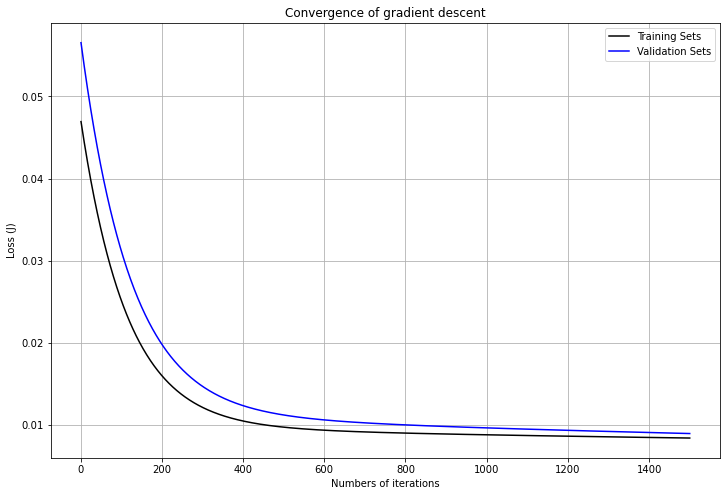

In [96]:
plt.plot(range(1, iterations + 1), loss_history, color = 'black')
plt.plot(range(1, iterations + 1), loss_history_test, color = 'blue')
plt.rcParams["figure.figsize"] = [12,8]
plt.grid()
plt.legend(['Training Sets', 'Validation Sets'])
plt.xlabel("Numbers of iterations")
plt.ylabel("Loss (J)")
plt.title("Convergence of gradient descent")